<a href="https://colab.research.google.com/github/2303A52174/AIML_2303A52174/blob/main/AIML_LAB_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AIML LAB EXTERNAL (2024 – 25)**

**SET – 2 (Logistic Regression)**

1. Implement logistic regression on a binary classification dataset.
2. Calculate and interpret the confusion matrix.
3. Evaluate the model using accuracy and F1-score.
4. Visualize the decision boundary of the logistic regression model.
5. Implement regularization (L1 or L2) and evaluate the model performance.



Confusion Matrix:
[[1120  532]
 [  10   61]]

Accuracy: 0.685432385374347
F1-Score: 0.18373493975903615

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.68      0.81      1652
           1       0.10      0.86      0.18        71

    accuracy                           0.69      1723
   macro avg       0.55      0.77      0.49      1723
weighted avg       0.95      0.69      0.78      1723



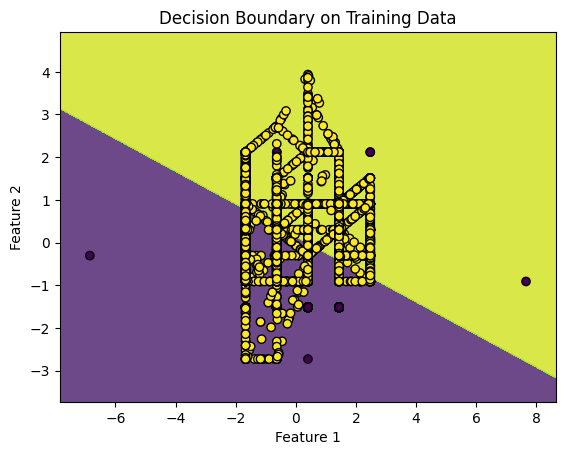


L1 Regularization:
Confusion Matrix:
[[1121  531]
 [  10   61]]

Accuracy: 0.686012768427162
F1-Score: 0.18401206636500755


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/bd_students_per.csv'
data = pd.read_csv(file_path)

# Create binary target variable: Science = 1, Others = 0
data['target'] = (data['stu_group'] == 'Science').astype(int)

# Select relevant features
features = ['age', 'family_size', 'attendance', 'english', 'math', 'science', 'social_science', 'art_culture']
X = data[features]
y = data['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Train logistic regression model with regularization (L2 by default)
log_reg_balanced = LogisticRegression()
log_reg_balanced.fit(X_train_balanced, y_train_balanced)

# Predict on test data
y_pred_balanced = log_reg_balanced.predict(X_test_scaled)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred_balanced)
accuracy = accuracy_score(y_test, y_pred_balanced)
f1 = f1_score(y_test, y_pred_balanced)
report = classification_report(y_test, y_pred_balanced)

print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("F1-Score:", f1)
print("\nClassification Report:\n", report)

# Visualize the decision boundary (only for two features)
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Reduce to two features for visualization
X_train_2d = X_train_balanced[:, :2]
X_test_2d = X_test_scaled[:, :2]
log_reg_2d = LogisticRegression()
log_reg_2d.fit(X_train_2d, y_train_balanced)

# Visualize the decision boundary
plot_decision_boundary(X_train_2d, y_train_balanced, log_reg_2d, "Decision Boundary on Training Data")

# Add regularization (L1) and evaluate
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear')
log_reg_l1.fit(X_train_balanced, y_train_balanced)
y_pred_l1 = log_reg_l1.predict(X_test_scaled)

# Evaluation for L1 regularization
conf_matrix_l1 = confusion_matrix(y_test, y_pred_l1)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
f1_l1 = f1_score(y_test, y_pred_l1)
print("\nL1 Regularization:")
print("Confusion Matrix:")
print(conf_matrix_l1)
print("\nAccuracy:", accuracy_l1)
print("F1-Score:", f1_l1)
